## TWITTER LISTENER

In [1]:
import tweepy
import json
import datetime

In [2]:
#Api Authentication Details
consumer_key = '5E2oMO7ZHGElss9cdaLY34x7b'
consumer_secret = 'fwjNRItWWRZ4ftRfwxBSHCwpGY5rth7cKKiZqY06Rru0KECfxi'
access_token = '1031238436064243718-YKGcYZF1yAKAcJTttGNXhAWpHWA4oh'
access_token_secret = 'U0u3Lq29f7PpOfO12q3fHX4nPhtlOV9fqXpEqDHlFbOqt'


In [3]:
#Authenticating the Application
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [4]:
api = tweepy.API(auth)

In [5]:
def save_tweets_in_file(filepath, username, tweet_count):
    file = open(filepath,'w')
    counter = 0
    for status in tweepy.Cursor(api.user_timeline, screen_name=username, count = tweet_count, tweet_mode="extended", include_rts = False).items():
        file.write(json.dumps(status._json) + '\n')
        counter += 1
        if(counter >= tweet_count):
            return
    file.close()

def get_user_tweets(api, username, tweet_count = 3000):
    filename = ('tweet' + username + '.json').replace(" ", "")
    print("tweets saved at: " + filename)
    save_tweets_in_file(filename, username,tweet_count)
    return

In [32]:
name_search = 'realdonaldtrump'
get_user_tweets(api, name_search)

tweets saved at: tweetrealdonaldtrump.json


In [33]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
df = pd.read_json('tweet' + name_search + ".json", lines = True)
#df = pd.read_json(open("tweetJoeRogan.json",'r', encoding="utf8"))

In [34]:
len(df)

547

In [35]:
df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,source,truncated,user
0,NaN,NaN,2019-06-25 20:27:19,"[0, 162]","{'hashtags': [{'text': 'MOH', 'indices': [158, 162]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/FkNCazkWWo', 'expanded_url': 'https://twitter.com/usarmy/status/1143605160989646849', 'display_url': 'twitter.com/usarmy/status/…', 'indices': [163, 186]}]}",NaN,12421,False,"Today, it was my great honor to present the Medal of Honor to Army Staff Sgt. David Bellavia (HERO) for his courageous actions as a squad leader in Fallujah. #MOH https://t.co/FkNCazkWWo",NaN,...,0.0,"{'created_at': 'Tue Jun 25 19:41:32 +0000 2019', 'id': 1143605160989646849, 'id_str': '1143605160989646849', 'full_text': 'Happening Now: @POTUS will present Staff Sgt. David Bellavia, @FightingFirst, with the Medal of Honor for his courageous actions taken, November 2004, during #OIF, during a ceremony at the @WhiteHouse. #ServeWithHonor #MOH https://t.co/StpfIU8IH9', 'truncated': False, 'display_text_range': [0, 247], 'entities': {'hashtags': [{'text': 'OIF', 'indices': [158, 162]}, {'text': 'ServeWithHonor', 'indices': [203, 218]}, {'text': 'MOH', 'indices': [219, 223]}], 'symbols': [], 'user_mentions': [{'screen_name': 'POTUS', 'name': 'President Trump', 'id': 822215679726100480, 'id_str': '822215679726100480', 'indices': [15, 21]}, {'screen_name': 'FightingFirst', 'name': '1st Infantry Division', 'id': 38002475, 'id_str': '38002475', 'indices': [62, 76]}, {'screen_name': 'WhiteHouse', 'name': 'The White House', 'id': 822215673812119553, 'id_str': '822215673812119553', 'indices': [189, 200]}], 'urls': [{'url': 'https://t.co/StpfIU8IH9', 'expanded_url': 'https://twitter.com/i/broadcasts/1MYxNdjnMqvGw', 'display_url': 'twitter.com/i/broadcasts/1…', 'indices': [224, 247]}]}, 'source': '<a href=""https://studio.twitter.com"" rel=""nofollow"">Twitter Media Studio</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 8775672, 'id_str': '8775672', 'name': 'U.S. Army', 'screen_name': 'USArmy', 'location': 'Washington, D.C.', 'description': 'Official Twitter page of the United States Army. (Following, RTs and links ≠ endorsement)', 'url': 'https://t.co/Yd6lLuxfbg', 'entities': {'url': {'urls': [{'url': 'https://t.co/Yd6lLuxfbg', 'expanded_url': 'https://go.usa.gov/xnETb', 'display_url': 'go.usa.gov/xnETb', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 1384347, 'friends_count': 563, 'listed_count': 8905, 'created_at': 'Mon Sep 10 01:04:15 +0000 2007', 'favourites_count': 7029, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 34462, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '4E4E4E', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/684036669515759616/BF3rskvn_normal.png', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/684036669515759616/BF3rskvn_normal.png', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/8775672/1561397988', 'profile_link_color': '2FC2EF', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '252429', 'profile_text_color': '666666', 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}, '

# List of Features

## Wordclouds
## Top 5 Liked tweet
## Cluster 5 Topics
## Average tweet length
## 5 Artificially generated tweets

In [36]:
df['full_text'][2]

'A brave former fighter jet pilot and warrior, Senator Martha McSally of Arizona has done an outstanding job in D.C., and is fully supportive of our agenda – she is with us all the way....'

In [37]:
df_text = df['full_text']
df_text.head()

0    Today, it was my great honor to present the Medal of Honor to Army Staff Sgt. David Bellavia (HERO) for his courageous actions as a squad leader in Fallujah. #MOH https://t.co/FkNCazkWWo                                                                                                 
1    ....Martha is strong on Crime and Borders, the 2nd Amendment, and loves our Military and Vets. She has my Complete and Total Endorsement!                                                                                                                                                  
2    A brave former fighter jet pilot and warrior, Senator Martha McSally of Arizona has done an outstanding job in D.C., and is fully supportive of our agenda – she is with us all the way....                                                                                                
3    ....Iran’s very ignorant and insulting statement, put out today, only shows that they do not understand reality. Any attack by I

In [38]:
# Cleanup for WordClouds - We make all words lowercase, delete simbols and links, then separate each word
import re
import string
def cleanup(sentence):
    cleanup_re1 = re.compile('[^a-z]+')
    cleanup_re2 = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    if type(sentence) is str:
        sentence = sentence.lower()
        sentence = sentence.replace("’", "")
        sentence = sentence.replace("'", "")
        sentence = cleanup_re2.sub(' ', sentence).strip()
        sentence = cleanup_re1.sub(' ', sentence).strip()

    return sentence

In [39]:
#Lowercase tweet list, with no simbols
df_text_clean = df_text.apply(cleanup)

In [40]:
df_text.head()

0    Today, it was my great honor to present the Medal of Honor to Army Staff Sgt. David Bellavia (HERO) for his courageous actions as a squad leader in Fallujah. #MOH https://t.co/FkNCazkWWo                                                                                                 
1    ....Martha is strong on Crime and Borders, the 2nd Amendment, and loves our Military and Vets. She has my Complete and Total Endorsement!                                                                                                                                                  
2    A brave former fighter jet pilot and warrior, Senator Martha McSally of Arizona has done an outstanding job in D.C., and is fully supportive of our agenda – she is with us all the way....                                                                                                
3    ....Iran’s very ignorant and insulting statement, put out today, only shows that they do not understand reality. Any attack by I

In [41]:
print(df_text_clean.head())

0    today it was my great honor to present the medal of honor to army staff sgt david bellavia hero for his courageous actions as a squad leader in fallujah moh                                                                                                                 
1    martha is strong on crime and borders the nd amendment and loves our military and vets she has my complete and total endorsement                                                                                                                                             
2    a brave former fighter jet pilot and warrior senator martha mcsally of arizona has done an outstanding job in d c and is fully supportive of our agenda she is with us all the way                                                                                           
3    irans very ignorant and insulting statement put out today only shows that they do not understand reality any attack by iran on anything american will be met with great an

In [42]:
def most_mentioned_dict(tweet_list):
    #Returns a dictionary, which keys are the users mentioned and the value the amoount of times they meantioned them
    most_mentioned = {}
    for tweet in tweet_list:
        if '@' in tweet:
            lista = re.findall("[@]\w+", tweet)
            for elem in lista:
                if elem not in most_mentioned:
                    most_mentioned[elem] = 1
                else:
                    most_mentioned[elem] += 1
    print(most_mentioned.values())
    return most_mentioned

## Wordclouds

In [43]:
#Creating word list, containing every word from every tweet
def prepare_wordcloud_data(tweet_list):
    wc_word_list = []
    for tweets in tweet_list:
        for word in tweets.split():
            wc_word_list.append(word)
    wc_word_string = " ".join(wc_word_list)
    return wc_word_string

In [44]:
tweet_text = prepare_wordcloud_data(df_text_clean)

In [45]:
#Generating the wordcloud
import codecs
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
def generate_tweet_wordcloud(text):
    img = Image.open("wordcloud/twitter11.png")
    hcmask = np.array(img)
    wc=WordCloud(width=6500,height=4300,background_color='black',mask=hcmask,max_words=300,max_font_size=100,stopwords=STOPWORDS)
    wc.generate(text)
    plt.figure(figsize=[60,40])
    plt.title('@' + name_search, fontsize=70)
    plt.imshow(wc.recolor(colormap='Pastel2',random_state=17), alpha=0.98)
    plt.axis('off')

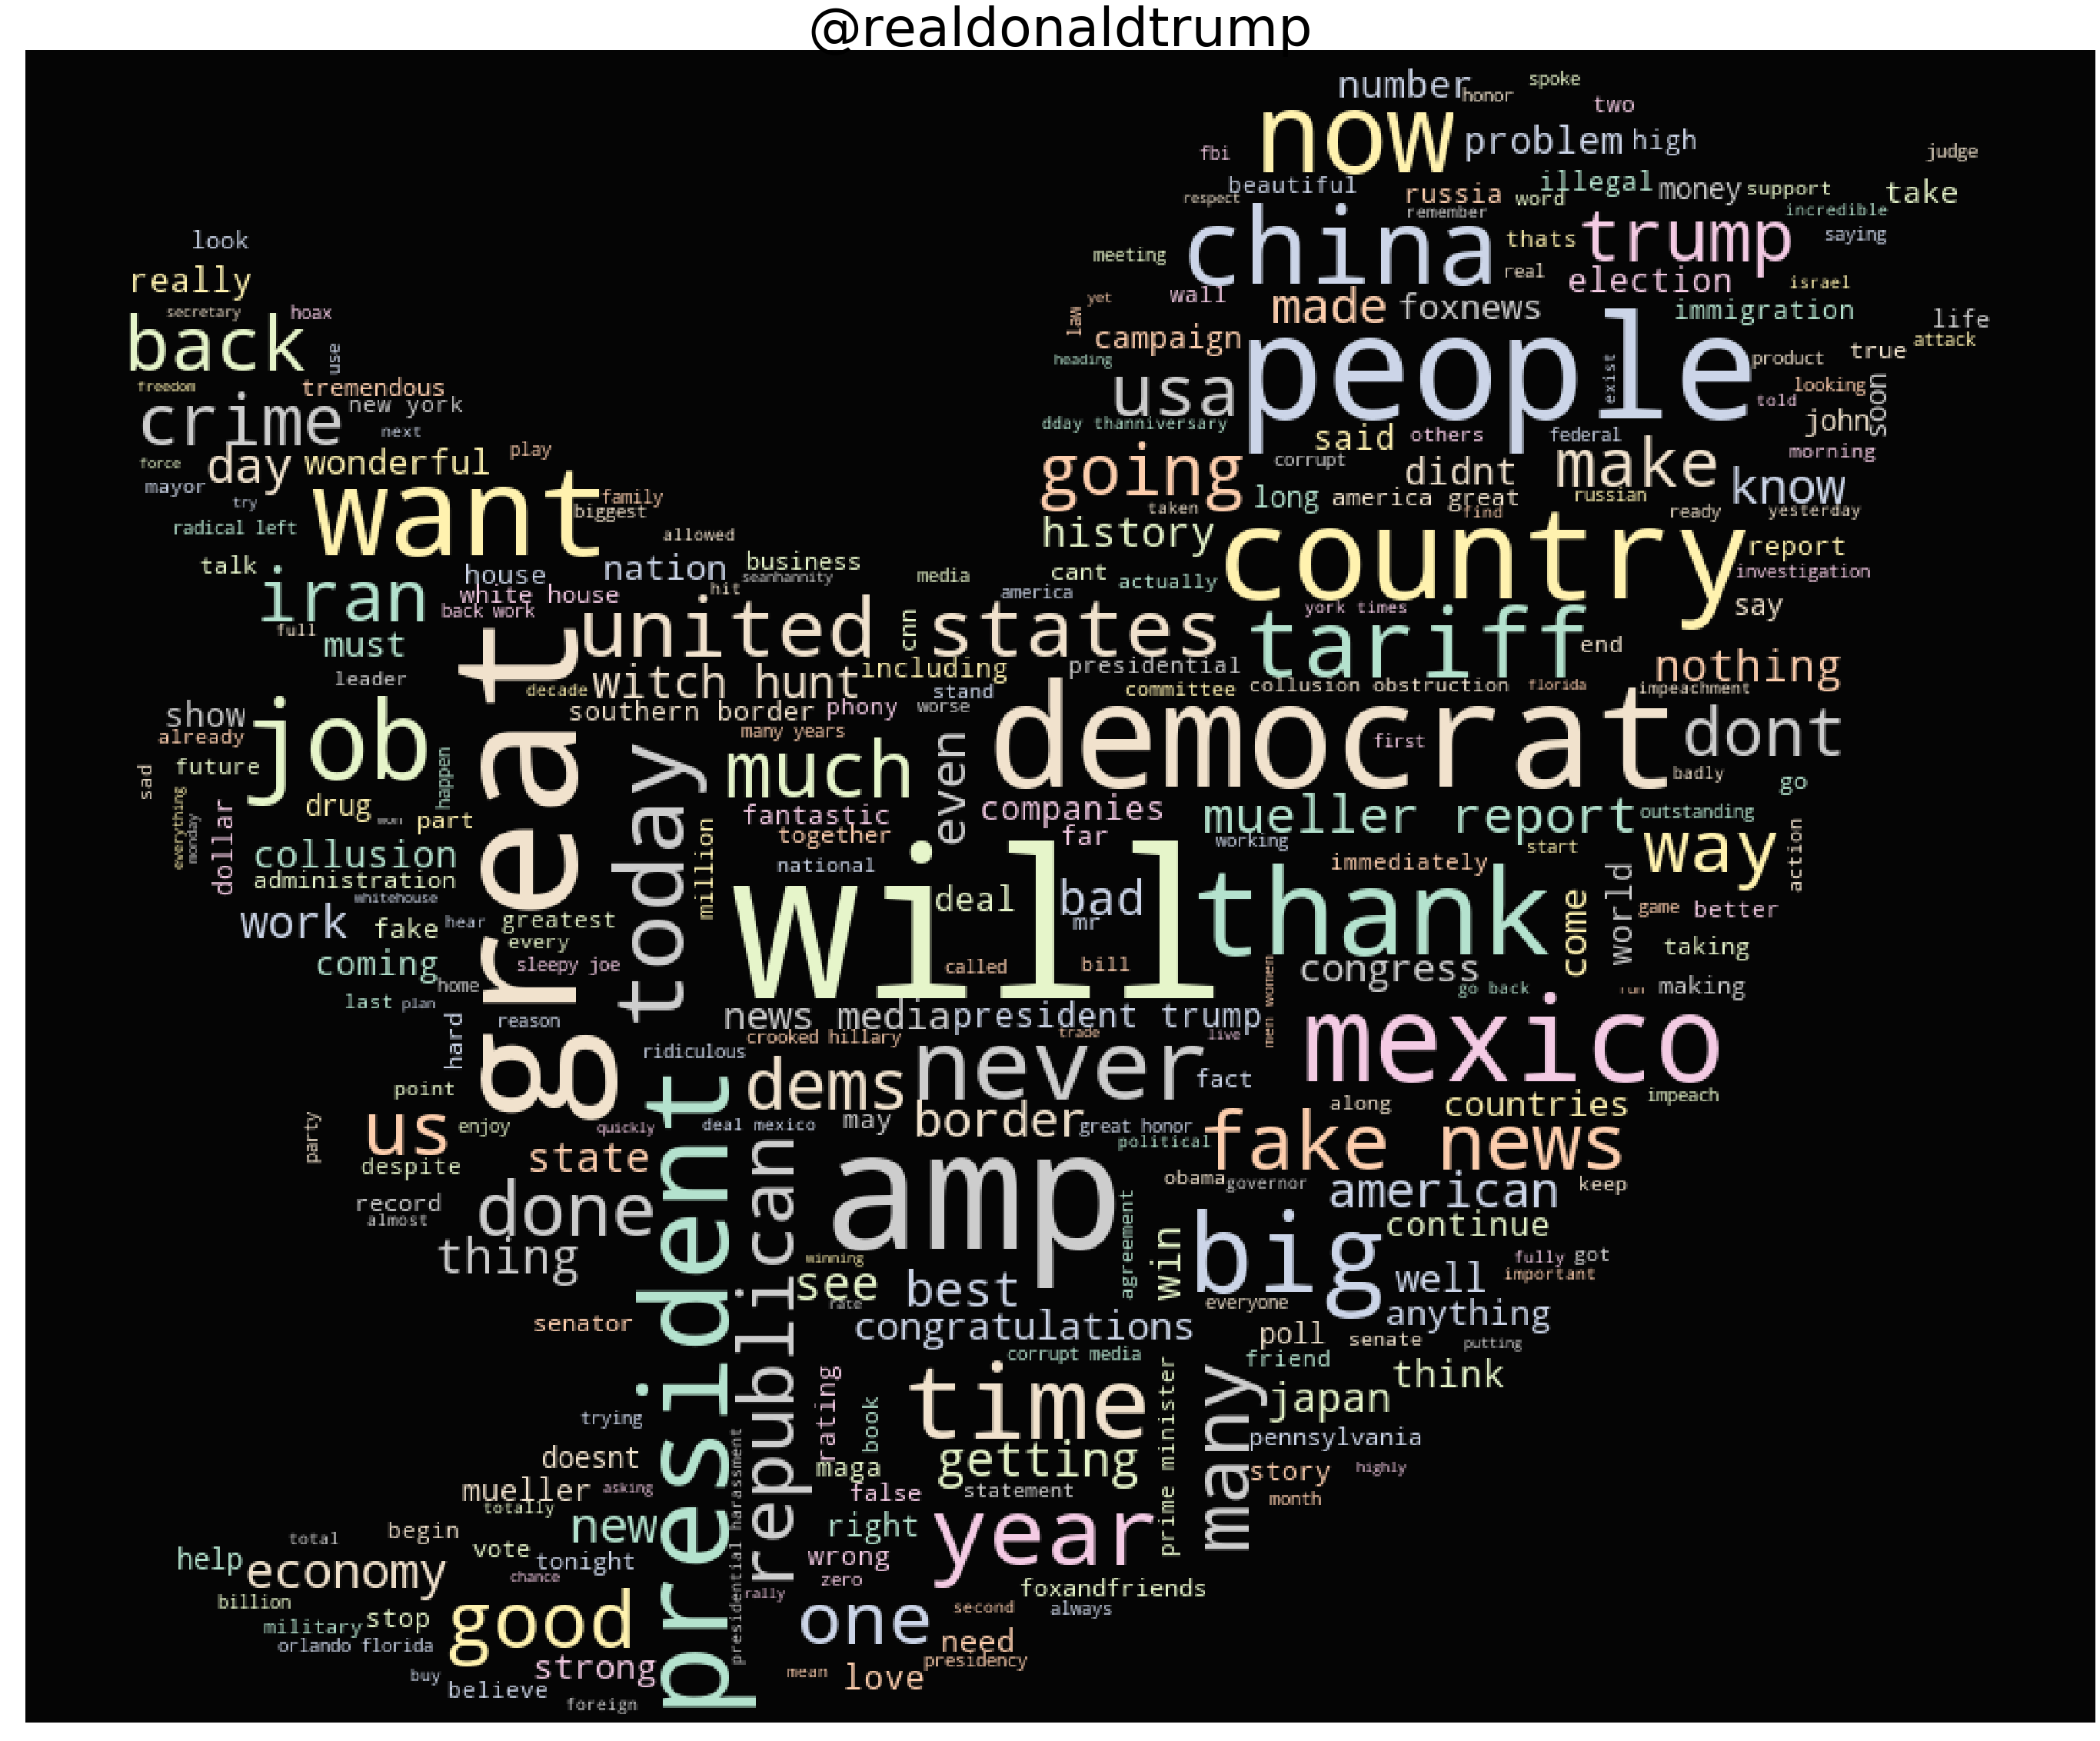

In [46]:
generate_tweet_wordcloud(tweet_text)

In [59]:
#return 5 most liked tweets
def get_most_liked_tweets(n,dataframe):
    most_liked_tweets = dataframe.nlargest(n,'favorite_count')
    return ["https://twitter.com/{}/status/{}".format(row.user['screen_name'],row.id) for index, row in most_liked_tweets.iterrows() ]

In [60]:
print(get_most_liked_tweets(5,df))

['https://twitter.com/realDonaldTrump/status/1142157838153895941', 'https://twitter.com/realDonaldTrump/status/1133531809118076929', 'https://twitter.com/realDonaldTrump/status/1141711064305983488', 'https://twitter.com/realDonaldTrump/status/1137155056044826626', 'https://twitter.com/realDonaldTrump/status/1131609042227482625']


In [61]:
#return 5 most liked tweets
def get_most_retweeted_tweets(n,dataframe):
    most_liked_tweets = dataframe.nlargest(n,'retweet_count')
    return ["https://twitter.com/{}/status/{}".format(row.user['screen_name'],row.id) for index, row in most_liked_tweets.iterrows() ]

In [62]:
print(get_most_retweeted_tweets(5,df))

['https://twitter.com/realDonaldTrump/status/1142157838153895941', 'https://twitter.com/realDonaldTrump/status/1130207891049332737', 'https://twitter.com/realDonaldTrump/status/1133531809118076929', 'https://twitter.com/realDonaldTrump/status/1141711064305983488', 'https://twitter.com/realDonaldTrump/status/1140302570394738688']


In [31]:
#Tomo 1000 muestras de las reviews conpuntaje 1 y lo mismo con las de puntaje 5

star1_text_sample= star1_text[:3000].copy()
star5_text_sample= star5_text[:3000].copy()
countvec_lda= LemmaCountVectorizer(max_df=0.95,min_df=5,stop_words="english",decode_error='ignore'
)
X_train_counts_lda_neg = countvec_lda.fit_transform(star1_text_sample) # Matriz bag of words de
los datos de entrenamiento
print(X_train_counts_lda_neg.shape)
print(X_train_counts_lda_neg.toarray())

SyntaxError: invalid syntax (<ipython-input-31-3c5f3d47ceb7>, line 8)